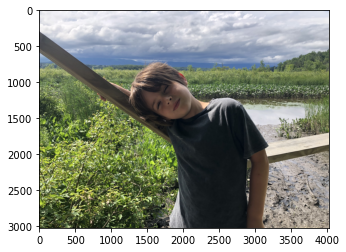

In [2]:
#Import Libraries
import cv2
import numpy as np
import copy
import time
import matplotlib.pyplot as plt

#Saving the image in a variable
img = cv2.imread('Graphics/damien.JPG')

#OpenCV by defualt uses BGR instead of RGB.  Old digital camera standard.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Use matplotlib while using a python notebook. Draw the image.
plt.imshow(img)

In [3]:
print(img.shape)

(3024, 4032, 3)


In [4]:
#Save the height and width.
h = img.shape[0]
w = img.shape[1]
d = img.shape[2]

# Start the counter
start = time.time()

#For each row in our grid.  
for y in range(0,h):
    #Search each pixel in the row.  **Notice we are starting at the 2nd pixel, array position 1, so we always have a pixel to the left. 
    for x in range(0,w):
        # For each pixel RGB value.  Color image so it's a 3D array.
         for z in range(0,d):
            # Nested Loops through the image.
            img[y,x,z] = img[y,x,z]

# Stop the counter
end = time.time()

print(end-start)

20.10682702064514


In [5]:
# Resize your image.
img = cv2.resize(img, None, fx= 0.5, fy= 0.5, interpolation= cv2.INTER_LINEAR)

In [6]:
print(img.shape)

(1512, 2016, 3)


In [7]:
#Save the height and width.
h = img.shape[0]
w = img.shape[1]
d = img.shape[2]

# Start the counter
start = time.time()

#For each row in our grid.  
for y in range(0,h):
    #Search each pixel in the row.  
    for x in range(0,w):
        # For each pixel RGB value.  Color image so it's a 3D array.
         for z in range(0,d):
            # Nested Loops through the image.
            img[y,x,z] = img[y,x,z]

# Stop the counter
end = time.time()

print(end-start)

4.617599010467529


In [8]:
import numpy as np
from numpy import interp

def rgb_to_hsv(rgb):
    # Input: rgb is an 3-D array [r,g,b] with values in range [0,255]. 
    # r = rgb[0][0][0], b = rgb[0][0][1], g = rgb[0][0][2]
    # Output: hsv is an 3-D array [h,s,v] with values in range h = [0,180], s = [0,255], v = [0,255].

    # Normalize color values.  Convert to floating point values between 0 - 1
    rgb = rgb/255

    # Initialize HSV
    h = 0.0
    s = 0.0
    v = 0.0

    # Find the max and min RGB values. 
    v = np.max(rgb)
    vMin = np.min(rgb)

    # Set the saturation value.
    if(v>0.0):
        s = (v - vMin)/v
    else:
        s = 0.0

    # Calculate (v - vMin) convenience
    diff = (v - vMin)

    # Compute the hue by the relative sizes of the RGB components

    # Are r,g,b equal. 
    if(rgb[0,0,0] == rgb[0,0,1] and rgb[0,0,1] == rgb[0,0,2]):
        h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(rgb[0,0,0] == v):
        h = 60 * (rgb[0,0,1] - rgb[0,0,2]) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(rgb[0,0,1] == v):
        h = 120 + 60 * (rgb[0,0,2] - rgb[0,0,0]) / diff
    # IS the point within +/- 60 degrees of the blue axis
    elif(rgb[0,0,2] == v):
        h = 240 + 60 * (rgb[0,0,0] - rgb[0,0,1]) / diff
  
  # interp function is used to convert the value of one range to other range 
    
    s = round(np.interp(s,[0,1],[0,255]))
    v = round(np.interp(v,[0,1],[0,255]))
    h=round(h/2)
    

    # Return hsv values.
    return np.array([[[h,s,v]]])

In [9]:
#For each row in our grid.  
for y in range(0,h):
    #Search each pixel in the row.  **Notice we are starting at the 2nd pixel, array position 1, so we always have a pixel to the left. 
    for x in range(0,w):
        currPixel = (img[y,x])
        print(currPixel)
        converted_to_3D = np.array(currPixel.reshape((1,1,3)))
        print(converted_to_3D)
        print(rgb_to_hsv(converted_to_3D))
        break
    break

[204 209 215]
[[[204 209 215]]]
[[[106  13 215]]]


In [11]:
#For each row in our grid.  
for y in range(0,h):
    #Search each pixel in the row.  
    for x in range(0,w):
        #All color channels
        for z in range(0,d):
            print(img[y,x,z])
            
        break
    break

204
209
215
